**Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Create a small Dataset**

In [ ]:
x=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])#Study hours
y=np.array([0,0,0,0,1,1,1,1,1,1])#0=Fail, 1=Pass

**Split Data into Training and Testing Sets**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Train Logistic Regression Model**

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

**Make Predictions**

In [ ]:
y_pred=model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 0]


**Evalute the Model**

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


**Visualize the Logistic Regression Curve**

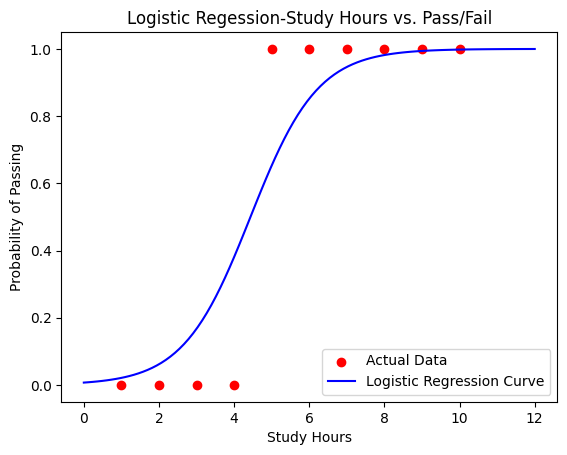

In [ ]:
x_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(x_range)[:,1]
plt.scatter(x,y, color="red",label="Actual Data")
plt.plot(x_range,y_prob,color="blue",label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regession-Study Hours vs. Pass/Fail")
plt.legend()
plt.show()

We will use thw heart disease dataset from kaggle to predict whether a patient has heart disease or not

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

Load Dataset

In [ ]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Exploratory Data Analysis**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

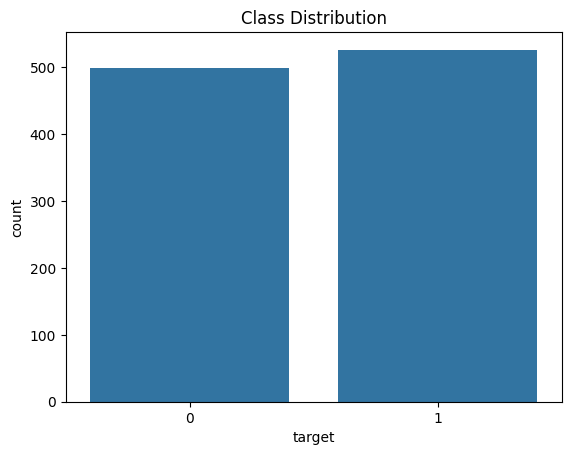

In [ ]:
print(df.isnull().sum())
print(df.describe())
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

**Feature selection and preprocessing**

In [ ]:
x=df.drop('target',axis=1)
y=df['target']
#Split the dataset into training and testing sets(80-20 split)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
#Standardize the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Train Logistic Regression Model**

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

**Make Predictions**

In [ ]:
y_pred=model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1]


Model Evalution

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



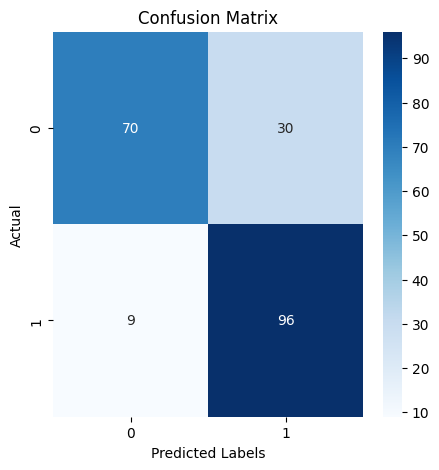

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
#Classification Report
print("\nClassification Report:\n",classification_report(y_test,y_pred))
#Confusion Matrix
plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()